In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

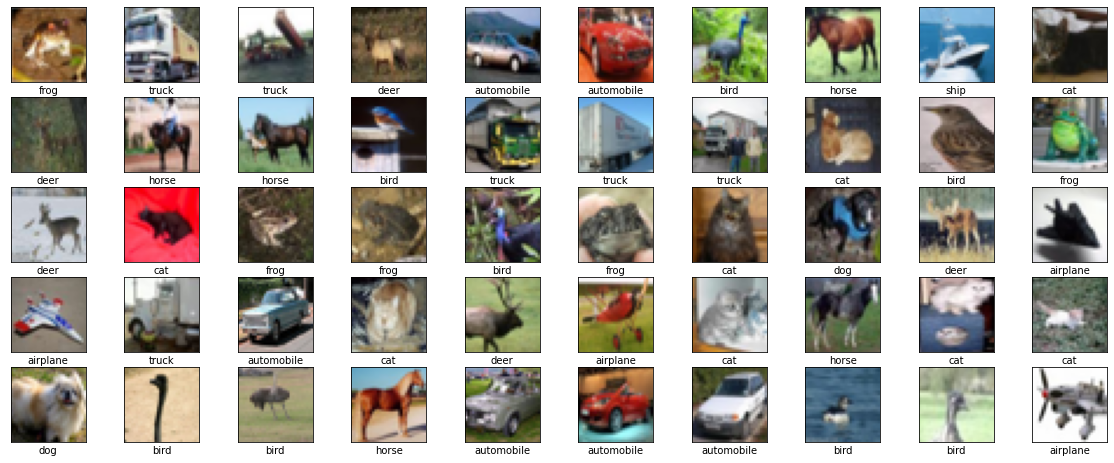

In [ ]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[i][0]])
    
plt.show()

In [ ]:
x_train, X_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    
    ## output layer
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 64)        

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h1=model.fit(x=x_train, y=y_train, epochs=20, validation_split=0.2, batch_size=32 )

Epoch 1/20
1250/1250 [==============================] - 60s 48ms/step - loss: 0.8962 - accuracy: 0.6855 - val_loss: 1.0706 - val_accuracy: 0.6390
Epoch 2/20
1250/1250 [==============================] - 62s 49ms/step - loss: 0.8497 - accuracy: 0.7016 - val_loss: 1.0058 - val_accuracy: 0.6553
Epoch 3/20
1250/1250 [==============================] - 62s 50ms/step - loss: 0.8038 - accuracy: 0.7182 - val_loss: 0.9787 - val_accuracy: 0.6663
Epoch 4/20
1250/1250 [==============================] - 62s 49ms/step - loss: 0.7556 - accuracy: 0.7351 - val_loss: 0.9523 - val_accuracy: 0.6755
Epoch 5/20
1250/1250 [==============================] - 65s 52ms/step - loss: 0.7140 - accuracy: 0.7492 - val_loss: 1.0038 - val_accuracy: 0.6732
Epoch 6/20
1250/1250 [==============================] - 64s 51ms/step - loss: 0.6851 - accuracy: 0.7606 - val_loss: 0.9355 - val_accuracy: 0.6876
Epoch 7/20
1250/1250 [==============================] - 65s 52ms/step - loss: 0.6509 - accuracy: 0.7696 - val_loss: 0.9785 -

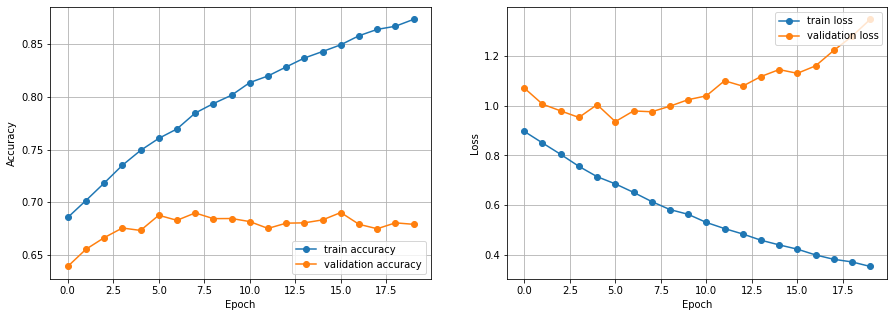

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 437.1548 - accuracy: 0.5311

Test Accuracy: 0.5310999751091003

Test Loss: 437.15484619140625


In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),  
]
)
model_2.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
model_2.compile(
    optimizer = keras.optimizers.SGD(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

In [29]:
h2=model_2.fit(x=x_train, y=y_train, epochs=20, validation_split=0.2, batch_size=32 )

NameError: ignored

In [30]:
model_3 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),  
]
)
model_3.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [31]:
model_3.compile(
    optimizer=keras.optimizers.RMSprop(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

In [32]:
h3 = model_3.fit(x=x_train, y=y_train, epochs=20, validation_split=0.2, batch_size=32 )

NameError: ignored